In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Supervised Learning

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/ML-assignment2/Salary.csv')

def read_csv(path):
  datalist=[]
  with open(path,'r') as f:
    lines = f.readlines()
    for line in lines:
      row = line.strip().split(',')

      for j in range(len(row)):
        row[j] = row[j].replace(" ","")
      datalist.append(row)
  return datalist

In [3]:
data = read_csv('/content/drive/MyDrive/ML-assignment2/Salary.csv')

education = []
occupation=[]
experience=[]
salary=[]

for i in range(1,201):
  education.append(data[i][2])
  occupation.append(data[i][3])
  experience.append(int(data[i][4].strip('"')))
  salary.append(int(data[i][5].strip('"')))
education = np.array(education)
occupation = np.array(occupation)
experience = np.array(experience)
salary= np.array(salary)

In [4]:
edu_unique = np.unique(education)
occ_unique = np.unique(occupation)

edu_dict = {}
occ_dict = {}

j=0
for i in edu_unique:
  if i not in edu_dict:
    edu_dict[i] = j
    j+=1
j=0
for i in occ_unique:
  if i not in occ_dict:
    occ_dict[i]=j
    j+=1

edu_unqarr = []
occ_unqarr = []

for i in range(200):
  edu_unqarr.append(edu_dict[education[i]])
  occ_unqarr.append(occ_dict[occupation[i]])
edu_arr = np.array(edu_unqarr)
occ_arr = np.array(occ_unqarr)

**Question1**

In [5]:
def least_square(x,y):
  a1 = 0
  a2 = 0
  n=len(x)
  b1=0
  a12=0
  for i in range(n):
    a1 += x[i]
    a2 += y[i]
    b1 += x[i]*y[i]
    a12 += x[i]*x[i]
  slope=(n*b1 - a1*a2)/(n*a12 - a1*a1)
  intercept = (a2/n) - (slope*(a1/n))
  return slope,intercept


edu_slope,intercept_edu = least_square(edu_arr,salary)
edu_x = np.linspace(0,len(edu_unique),100)
edu_y = edu_x*edu_slope + intercept_edu

occ_slope,occ_int = least_square(occ_arr,salary)
occ_x = np.linspace(0,len(occ_unique),100)
occ_y = occ_x*occ_slope + occ_int

exp_slope,exp_int = least_square(experience,salary)
exp_x = np.linspace(min(experience), max(experience),100)
exp_y = exp_x*exp_slope + exp_int


Text(0.5, 0, 'Education')

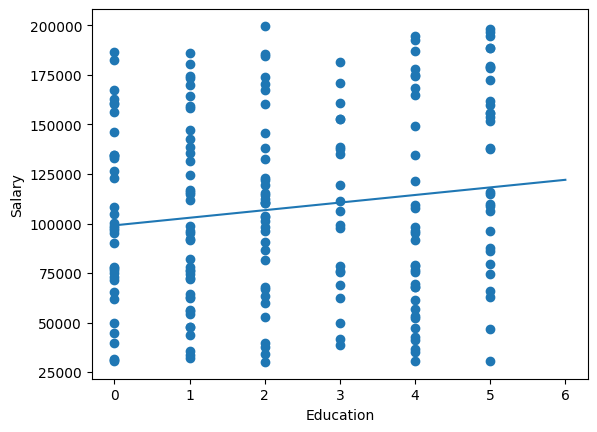

In [9]:
plt.figure()
plt.scatter(edu_arr,salary)
plt.plot(edu_x,edu_y)
plt.ylabel("Salary")
plt.xlabel("Education")


Text(0.5, 0, 'Occupation')

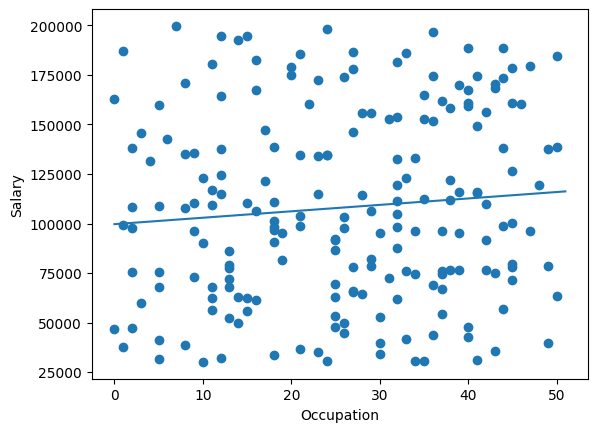

In [7]:
plt.figure()
plt.scatter(occ_arr,salary)
plt.plot(occ_x,occ_y)
plt.ylabel("Salary")
plt.xlabel("Occupation")

Text(0.5, 0, 'Experience')

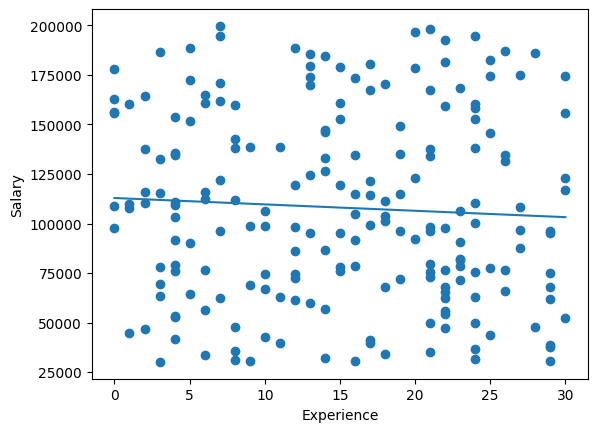

In [8]:
plt.figure()
plt.scatter(experience,salary)
plt.plot(exp_x,exp_y)
plt.ylabel("Salary")
plt.xlabel("Experience")

**Question2**

In [10]:
def r_score(x,y,slope,intercept):
  n = len(x)
  y_mean=sum(y)/n

  sst = sum((y[i]-y_mean)**2 for i in range(n))

  sse = sum((y[i] - (slope*x[i] + intercept))**2 for i in range(n))

  r2_score = 1 - (sse/sst)

  return r2_score

r_squared_edu = r_score(edu_arr,salary,edu_slope,intercept_edu)

r_squared_occ = r_score(occ_arr,salary,occ_slope,occ_int)

r_squared_exp = r_score(experience,salary,exp_slope,exp_int)

print("Education: " , r_squared_edu)
print("Occupation: " , r_squared_occ)
print("Experience: " , r_squared_exp)

Education:  0.0194705467052958
Occupation:  0.008748951013390127
Experience:  0.00346314739488518


**Question3**

In [11]:
num_samples = len(edu_arr)
X_multi = np.column_stack((edu_arr, occ_arr, experience))
X_multi = np.column_stack((np.ones(num_samples), X_multi))

y_multi = salary
beta_multi = np.linalg.inv(X_multi.T @ X_multi) @ X_multi.T @ y_multi


y_pred_multi = X_multi @ beta_multi

residuals_multi = y_multi - y_pred_multi

ssr = np.sum((y_pred_multi - np.mean(y_multi))**2)
sst = np.sum((y_multi - np.mean(y_multi))**2)
r_squared_multi = ssr / sst

print("R-squared for Multiple Linear Regression:", r_squared_multi)


degree = 10  # You can change the degree as needed

# Create the polynomial features
poly_features = np.column_stack((edu_arr**degree, occ_arr**degree, experience**degree))

# Add a column of ones for the intercept term
poly_features = np.column_stack((np.ones(num_samples), poly_features))
beta_poly = np.linalg.inv(poly_features.T @ poly_features) @ poly_features.T @ y_multi

# Make predictions with polynomial regression
y_pred_poly = poly_features @ beta_poly

# Calculate the residuals
residuals_poly = y_multi - y_pred_poly

ssr_poly = np.sum((y_pred_poly - np.mean(y_multi))**2)
r_squared_poly = ssr_poly / sst

print("R-squared for Polynomial Regression:", r_squared_poly)

#Degree = 10 was taken as the best R-squared score was obtained for it with the help of hit and trial


R-squared for Multiple Linear Regression: 0.029622254148746488
R-squared for Polynomial Regression: 0.05020684532699753


In [ ]:
combined = np.column_stack((edu_arr,occ_arr,experience))

mean = np.mean(combined,axis=0)
std_dev = np.std(combined,axis=0)
std_combined = (combined - mean) / std_dev

cov_matrix = np.cov(std_combined,rowvar=False)

eigenvalues , eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

num_components = 2

top_eigenvectors = eigenvectors[:, :num_components]
combined_pca = std_combined.dot(top_eigenvectors)

combined_pca = np.column_stack((np.ones(combined_pca.shape[0]), combined_pca))
y = salary

coefficients = np.linalg.inv(combined_pca.T.dot(combined_pca)).dot(combined_pca.T).dot(y)
y_pred = combined_pca.dot(coefficients)

ssr = np.sum((y_pred - np.mean(y))**2)
sst = np.sum((y - np.mean(y))**2)
r_squared = ssr / sst
r_squared

0.02204684964789132

In [ ]:
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    standardized_data = (X - mean) / std_dev
    return standardized_data, mean, std_dev

# Standardize the data
X_std, mean_values, std_dev_values = standardize_data(combined)

# Function to check orthogonality and orthogonalize variables
def check_orthogonality(X):
    # Calculate dot products between all pairs of columns
    dot_products = np.dot(X.T, X)
    # Check if dot_products is diagonal (variables are orthogonal)
    is_orthogonal = np.allclose(dot_products, np.diag(np.diag(dot_products)))
    return is_orthogonal

# Check for orthogonality
is_orthogonal = check_orthogonality(X_std)

# Print whether variables are orthogonal or not
# if is_orthogonal:
#     print("The variables are orthogonal.")
# else:
    # print("The variables are not orthogonal and will be orthogonalized.")
def orthogonalize_variables(X):
    q1 = X[:, 0]
    q2 = X[:, 1] - np.dot(q1, X[:, 1]) / np.dot(q1, q1) * q1
    q3 = X[:, 2] - np.dot(q1, X[:, 2]) / np.dot(q1, q1) * q1 - np.dot(q2, X[:, 2]) / np.dot(q2, q2) * q2
    return np.column_stack((q1, q2, q3))

# If not orthogonal, orthogonalize variables
# if not is_orthogonal:
X_orthogonalized = orthogonalize_variables(X_std)
# else:
#     X_orthogonalized = X_std

# Function to perform multiple linear regression
def linear_regression(X, y):
    X_with_bias = np.column_stack((np.ones(X.shape[0]), X))  # Add bias term
    coefficients = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)
    return coefficients

# Perform multiple linear regression on orthogonalized data
coefficients_orthogonalized = linear_regression(X_orthogonalized, salary)

# Predict using multiple linear regression on orthogonalized data
X_with_bias = np.column_stack((np.ones(X_orthogonalized.shape[0]), X_orthogonalized))
y_pred_orthogonalized = X_with_bias.dot(coefficients_orthogonalized)

def r_squared(y_true, y_pred):
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return r2

r2_orthogonalized = r_squared(salary, y_pred_orthogonalized)
r2_orthogonalized

0.02962225414874653

We observe that the R-squared value of multiple linear regression of an orthogonal matrix comes out to be same as that of multiple linear regression of the original matrix

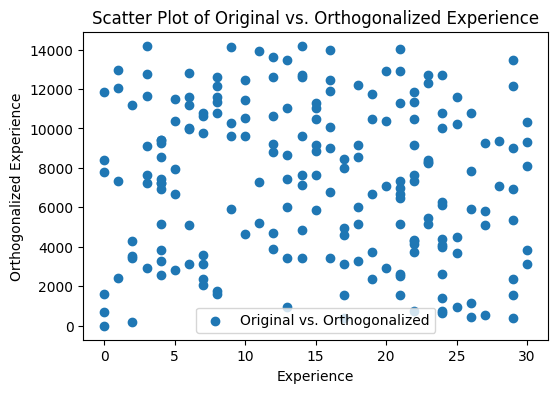

In [ ]:
combined1 = np.column_stack((edu_arr,occ_arr,experience))
exp1 = combined1[:,-1]
others = combined1[:,:-1]
exp_mean = np.mean(exp1)
exp_std = np.std(exp1)
expe_std = (exp1 - exp_mean)/exp_std

coef = np.dot(others.T,expe_std)
ortho_expe = expe_std - np.dot(others,coef)

plt.figure(figsize=(6, 4))
plt.scatter(experience, ortho_expe, label='Original vs. Orthogonalized')
# Add labels and title
plt.xlabel('Experience')
plt.ylabel('Orthogonalized Experience')
plt.title('Scatter Plot of Original vs. Orthogonalized Experience')

# Add a legend
plt.legend()

# Unsupervised Learning


**question1**

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML-assignment2/Airplane.csv')
data_file = df
# Remove rows with NaN values
df = df.dropna()
# Remove columns with string values (if any)
# df = df.select_dtypes(exclude=['object'])
df = df[['Aboard','Fatalities','Ground']]
# Normalize the data (optional, but recommended for PCA)
df_normalized = (df - df.mean()) / df.std()

# Calculate the covariance matrix
cov_matrix = np.cov(df_normalized, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the variance explained by each principal component
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

percent_variance_1st_pc = explained_variance_ratio[0] * 100

percent_variance_1st_2nd_pc = cumulative_variance_ratio[1] * 100

print("Percentage of variance covered by first principle component: "+str(percent_variance_1st_pc))
print("Percentage of variance covered by first and second principle components: "+str(percent_variance_1st_2nd_pc))

Percentage of variance covered by first principle component: 57.85460800441731
Percentage of variance covered by first and second principle components: 91.16110977667027


In [ ]:
def cdist(arr1,arr2):
  return math.sqrt(sum((a - b) ** 2 for a, b in zip(arr1, arr2)))
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids) #Step 2

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids)
        points = np.array([np.argmin(i) for i in distances])

    return points

**question2**

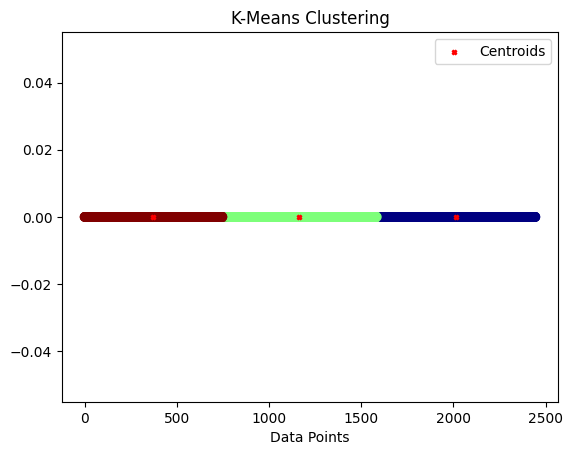

In [ ]:
dataset_directory = '/content/drive/MyDrive/ML-assignment2/Airplane.csv'

# Load the data using Pandas
data = pd.read_csv(dataset_directory)

# Extract the relevant column for K-means clustering
type_column = data['Type'].copy()

# Remove rows with NaN values
type_column.dropna(inplace=True)

# Convert string values into numerical labels
unique_types = np.unique(type_column)
type_labels = np.arange(len(unique_types))
type_mapping = dict(zip(unique_types, type_labels))
type_column_encoded = np.array([type_mapping[val] for val in type_column])

k = 3

centroids = np.random.choice(type_column_encoded, k)

# K-means algorithm
max_iterations = 100
for _ in range(max_iterations):
    distances = np.abs(type_column_encoded[:, np.newaxis] - centroids)
    labels = np.argmin(distances, axis=1)

    # Calculate new centroids only for non-empty clusters
    new_centroids = np.array([type_column_encoded[labels == i].mean() if np.any(labels == i) else centroids[i] for i in range(k)])

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids
type_centroids = centroids
# sil_score(type_column_encoded,k,type_labels)
# Create a colormap for plotting
colors = plt.cm.jet(np.linspace(0, 1, k))

# Plot the data points colored by their cluster assignment
plt.scatter(type_column_encoded, np.zeros_like(type_column_encoded), c=labels, cmap='jet')

# Plot the cluster centroids
plt.scatter(centroids, np.zeros_like(centroids), c='red', marker='X', s=10, label='Centroids')

plt.xlabel('Data Points')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

**question3**

Silhouette Score: 0.37
5248


<ipython-input-122-8f160b0e40f5>:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(combine_loc_ope[labels == i, 0], combine_loc_ope[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')


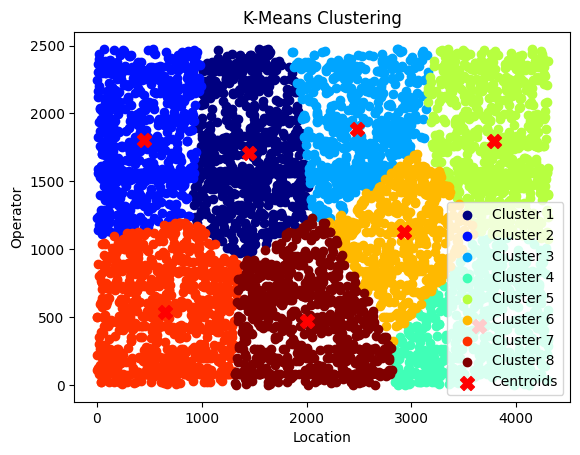

In [ ]:
loc = data['Location']
ope = data['Operator']

loc.dropna(inplace=True)
ope.dropna(inplace=True)

unique_loc = np.unique(loc)
loc_labels = np.arange(len(unique_loc))
loc_mapping = dict(zip(unique_loc, loc_labels))
loc1 = np.array([loc_mapping[val] for val in loc])

unique_ope = np.unique(ope)
ope_labels = np.arange(len(unique_ope))
ope_mapping = dict(zip(unique_ope, ope_labels))
ope1 = np.array([ope_mapping[val] for val in ope])

min_length = min(len(loc1), len(ope1))
loc1 = loc1[:min_length]
ope1 = ope1[:min_length]

combine_loc_ope = np.column_stack((loc1,ope1))
combine_loc_ope = combine_loc_ope[~np.isnan(combine_loc_ope).any(axis=1)]

k=8

np.random.seed(0)

random_indices = np.random.choice(combine_loc_ope.shape[0], k, replace=False)
centroids = combine_loc_ope[random_indices]

max_iterations=100
for _ in range(max_iterations):
  distances = np.linalg.norm(combine_loc_ope[:, np.newaxis] - centroids, axis=2)
  labels = np.argmin(distances, axis=1)
  new_centroids = np.array([combine_loc_ope[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
  if np.all(centroids == new_centroids):
        break
  centroids = new_centroids

type_labels = labels
sil_score(combine_loc_ope,k,type_labels)
# print(len(type_labels))
colors = plt.cm.jet(np.linspace(0, 1, k))

# Plot the data points colored by their cluster assignment
for i in range(k):
    plt.scatter(combine_loc_ope[labels == i, 0], combine_loc_ope[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')


plt.xlabel('Location')
plt.ylabel('Operator')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

A score of 0.37 shows that the data is well mapped to their respective clusters. This score can range between 1 to -1 where a value near to 1 shows a good mapping while one near to -1 shows a poor result.

In [ ]:
rou = data['Route']
fat = data['Fatalities']

rou.dropna(inplace=True)
fat.dropna(inplace=True)

unique_rou = np.unique(rou)
rou_labels = np.arange(len(unique_rou))
rou_mapping = dict(zip(unique_rou, rou_labels))
rou1 = np.array([rou_mapping[val] for val in loc])

min_length = min(len(rou1), len(fat))
rou1 = rou1[:min_length]
fat = fat[:min_length]

combine_rou_fat = np.column_stack((rou1,fat))
combine_rou_fat = combine_rou_fat[~np.isnan(combine_rou_fat).any(axis=1)]

k=8

np.random.seed(0)

random_indices = np.random.choice(combine_rou_fat.shape[0], k, replace=False)
centroids = combine_rou_fat[random_indices]

max_iterations=100
for _ in range(max_iterations):
  distances = np.linalg.norm(combine_rou_fat[:, np.newaxis] - centroids, axis=2)
  labels = np.argmin(distances, axis=1)
  new_centroids = np.array([combine_rou_fat[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(k)])
  if np.all(centroids == new_centroids):
        break
  centroids = new_centroids

colors = plt.cm.jet(np.linspace(0, 1, k))

# Plot the data points colored by their cluster assignment
for i in range(k):
    plt.scatter(combine_rou_fat[labels == i, 0], combine_rou_fat[labels == i, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

KeyError: ignored

**question5**

In [ ]:
def sil_score(data,k,labels):
  pairwise_distances = np.abs(data[:, np.newaxis] - data)
  mean_distances_within_clusters = np.zeros(k)
  mean_distance_nearest_clusters = np.zeros(k)

  for i in range(k):
      cluster_mask = labels == i
      cluster_data = data[cluster_mask]

      mean_distances_within_clusters[i] = np.mean(pairwise_distances[cluster_mask][:, cluster_mask])

      other_clusters_distances = np.mean(pairwise_distances[cluster_mask][:, labels != i], axis=1)
      mean_distance_nearest_clusters[i] = np.min(other_clusters_distances)

  silhouette_scores = (mean_distance_nearest_clusters - mean_distances_within_clusters) / np.maximum(mean_distance_nearest_clusters, mean_distances_within_clusters)
  silhouette_avg = np.mean(silhouette_scores)

  print(f'Silhouette Score: {silhouette_avg:.2f}')